In [0]:
!pip install glove_python

In [0]:
from glove import Corpus,Glove

In [0]:
corpus = Corpus() #Creating corpus object

In [26]:
from google.colab import files
uploaded=files.upload()


Saving part-amazon-reviews-unlocked-mobile-phones.csv to part-amazon-reviews-unlocked-mobile-phones.csv


In [0]:
import pandas as pd
import io
import pickle
review_lines = pickle.load(io.BytesIO(uploaded["amazon_products_preprocessed.data"])) 
review_lines[0]

['feel',
 'lucky',
 'find',
 'use',
 'phone',
 'use',
 'hard',
 'phone',
 'line',
 'someone',
 'upgrade',
 'sell',
 'one',
 'son',
 'like',
 'old',
 'one',
 'finally',
 'fell',
 'apart',
 'year',
 'nt',
 'want',
 'upgrade',
 'thank',
 'seller',
 'really',
 'appreciate',
 'honesty',
 'say',
 'use',
 'phonei',
 'recommend',
 'seller',
 'highly',
 'would']

In [0]:
raw_data = pd.read_csv(io.BytesIO(uploaded["part-amazon-reviews-unlocked-mobile-phones.csv"]))


### Training the corpus to generate the co-occurence matrix which is used in GloVe

In [0]:
corpus.fit(review_lines, window=5) #window — this is the distance between two words algo should consider to find some relationship between them

### Creating a glove model uses the co-occurrence matrix generated by the Corpus object to create the embeddings

In [0]:
glove = Glove(no_components=150, learning_rate=0.05) #no_of_components — the dimension of the output vector generated by the GloVe
                                                  #learning_rate — Algo uses gradient descent so learning rate defines the rate at which the algo reaches towards the minima

In [0]:
glove.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True) #corpus.matrix -  the matrix of word-word co-occurrences


Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


### The dictionary addition in the glove object

In [0]:
glove.add_dictionary(corpus.dictionary)


In [0]:
print(glove.word_vectors[glove.dictionary['great']])


[ 0.11475582  0.30052625  0.13744998 -0.19693046 -0.23826903 -0.24334479
  0.02635842 -0.28393448  0.24542128  0.07586155 -0.17572121  0.29429469
  0.13178955 -0.2638072  -0.2578367   0.2121312  -0.03202241 -0.11956693
  0.34164059  0.11891612  0.19729762  0.31155365 -0.15091276 -0.19538973
 -0.04284396  0.17470623  0.23259746  0.13229536 -0.30602217  0.30085769
 -0.19310427  0.02089925 -0.19881983 -0.22389894 -0.29106801  0.21940204
  0.05517919 -0.00855481  0.21958413 -0.23978982 -0.06676452 -0.0158756
 -0.17436473  0.04445533  0.19947031 -0.12505612 -0.00426663 -0.00632102
  0.10329921  0.28517696  0.035535   -0.22520967 -0.18538167  0.24619276
  0.21961859 -0.00820337 -0.02555517 -0.09539616 -0.10765449 -0.2391652
 -0.20613498 -0.18297024  0.03363358  0.0035916   0.08597207  0.20223684
 -0.16262859 -0.28392402  0.27084875  0.23958245 -0.35975681 -0.00486274
  0.21195178  0.11268138 -0.10908147 -0.13469707  0.19932559 -0.16026536
 -0.19384458  0.08798839  0.11153734  0.25016186  0.2

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
glove.save('glove_amazon_model.txt')


In [0]:
path = "/content/gdrive/My Drive/Colab Notebooks/glove_amazon_model.txt"

In [0]:
embeddings = {word: glove.word_vectors[glove.dictionary[word]] for word in glove.dictionary.keys()}
print('Number of vectors: ', len(embeddings))


Number of vectors:  8738


In [0]:
embeddings.get("great")

array([ 0.11475582,  0.30052625,  0.13744998, -0.19693046, -0.23826903,
       -0.24334479,  0.02635842, -0.28393448,  0.24542128,  0.07586155,
       -0.17572121,  0.29429469,  0.13178955, -0.2638072 , -0.2578367 ,
        0.2121312 , -0.03202241, -0.11956693,  0.34164059,  0.11891612,
        0.19729762,  0.31155365, -0.15091276, -0.19538973, -0.04284396,
        0.17470623,  0.23259746,  0.13229536, -0.30602217,  0.30085769,
       -0.19310427,  0.02089925, -0.19881983, -0.22389894, -0.29106801,
        0.21940204,  0.05517919, -0.00855481,  0.21958413, -0.23978982,
       -0.06676452, -0.0158756 , -0.17436473,  0.04445533,  0.19947031,
       -0.12505612, -0.00426663, -0.00632102,  0.10329921,  0.28517696,
        0.035535  , -0.22520967, -0.18538167,  0.24619276,  0.21961859,
       -0.00820337, -0.02555517, -0.09539616, -0.10765449, -0.2391652 ,
       -0.20613498, -0.18297024,  0.03363358,  0.0035916 ,  0.08597207,
        0.20223684, -0.16262859, -0.28392402,  0.27084875,  0.23

### Here I tokenize and encode the words

In [0]:
from keras.preprocessing.text import Tokenizer

tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(review_lines)
sequences = tokenizer_obj.texts_to_sequences(review_lines)

#fit_on_texts : Update internal vocabulary based on a list of texts. This method (fix_on_texts) creates 
# the vocabulary index based on word frequency (word --> index dictionary). Lower integer means more frequent word 
# 0 is reserved for padding

# texts_to_sequences : Transforms each text in texts to a sequence of integers. So it basically takes each 
# word in the text and replaces it with its corresponding integer value from the word_index dictionary.
print(review_lines[0])
print(sequences[0])

Using TensorFlow backend.


['feel', 'lucky', 'find', 'use', 'phone', 'use', 'hard', 'phone', 'line', 'someone', 'upgrade', 'sell', 'one', 'son', 'like', 'old', 'one', 'finally', 'fell', 'apart', 'year', 'nt', 'want', 'upgrade', 'thank', 'seller', 'really', 'appreciate', 'honesty', 'say', 'use', 'phonei', 'recommend', 'seller', 'highly', 'would']
[115, 1635, 78, 5, 1, 5, 229, 1, 346, 377, 289, 256, 10, 278, 9, 75, 10, 347, 884, 916, 112, 2, 44, 289, 176, 63, 22, 917, 2331, 33, 5, 812, 53, 63, 286, 12]


In [0]:
word_index = tokenizer_obj.word_index
print('Found %s tokens.' %len(word_index))
print(word_index)

Found 8738 tokens.
{'phone': 1, 'nt': 2, 'work': 3, 'good': 4, 'use': 5, 'great': 6, 'get': 7, 'screen': 8, 'like': 9, 'one': 10, 'buy': 11, 'would': 12, 'price': 13, 'well': 14, 'battery': 15, 'new': 16, 'iphone': 17, 'love': 18, 'come': 19, 'time': 20, 'camera': 21, 'really': 22, 'go': 23, 'card': 24, 'look': 25, 'sim': 26, 'take': 27, 'back': 28, 'product': 29, 'make': 30, 'even': 31, 'need': 32, 'say': 33, 'day': 34, 'charge': 35, 'also': 36, 'problem': 37, 'nice': 38, 'call': 39, 'purchase': 40, 'quality': 41, 'speaker': 42, 'could': 43, 'want': 44, 'much': 45, 'fast': 46, 'android': 47, 'apps': 48, 'thing': 49, 'receive': 50, 'review': 51, 'excellent': 52, 'recommend': 53, 'still': 54, 'issue': 55, 'feature': 56, 'money': 57, 'return': 58, 'month': 59, 'condition': 60, 'sound': 61, 'alcatel': 62, 'seller': 63, 'amazon': 64, 'try': 65, 'give': 66, 'first': 67, 'bad': 68, 'turn': 69, 'think': 70, 'case': 71, 'charger': 72, 'life': 73, 'seem': 74, 'old': 75, 'unlocked': 76, 'update'

In [0]:
sequence_size = 30  # same size found for Word2Vec 

In [29]:
from keras.preprocessing.sequence import pad_sequences

review_pad = pad_sequences(sequences,maxlen=sequence_size)
rating = raw_data['Rating'].values
print(review_pad[0])
print('Shape of review tensor: ', review_pad.shape)
print('Shape of rating tensor: ', rating.shape)

[ 229    1  346  377  289  256   10  278    9   75   10  347  884  916
  112    2   44  289  176   63   22  917 2331   33    5  812   53   63
  286   12]
Shape of review tensor:  (6000, 30)
Shape of rating tensor:  (6000,)


### Preparing the embedding matrix

In [0]:
import numpy as np
num_words = len(word_index)+1
embedding_matrix = np.zeros((num_words,150))

for word, i in word_index.items():
    if i>num_words:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [33]:
print(embedding_matrix.shape)

(8739, 150)


### Building a model

In [0]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Embedding
from keras.models import Model
from keras.initializers import Constant
from keras import optimizers


model = Sequential()
embedding_layer = Embedding(num_words,
                           150,
                           embeddings_initializer = Constant(embedding_matrix),
                            input_length=sequence_size,
                           trainable = False)
model.add(embedding_layer)
model.add(Dense(2**9,input_dim=150,activation='relu',name='hidden1'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(2**6,activation='relu',name='hidden2'))
#model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax',name='softmax'))
op = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=op, loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 30, 150)           1310850   
_________________________________________________________________
hidden1 (Dense)              (None, 30, 512)           77312     
_________________________________________________________________
flatten_8 (Flatten)          (None, 15360)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 15360)             0         
_________________________________________________________________
hidden2 (Dense)              (None, 64)                983104    
_________________________________________________________________
softmax (Dense)              (None, 5)                 325       
Total params: 2,371,591
Trainable params: 1,060,741
Non-trainable params: 1,310,850
____________________________________

### Now I prepare the data to feed the model. I'll split the data.

In [41]:
from keras.utils import np_utils

validation_split = 0.2
indices = np.arange(review_pad.shape[0])
np.random.shuffle(indices)
review_pad = review_pad[indices]
rating = rating[indices]
num_validation_samples = int(validation_split*review_pad.shape[0])

X_train_pad = review_pad[:-num_validation_samples]
y_train = rating[:-num_validation_samples]
X_test_pad = review_pad[-num_validation_samples:]
y_test = rating[-num_validation_samples:]
y_train_categ = np_utils.to_categorical(y_train-min(y_train))  # one hot encoding and returns an array
y_test_categ = np_utils.to_categorical(y_test-min(y_test))
y_train_categ

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [42]:
print('Shape of X_train_pad tensor: ', X_train_pad.shape)
print('Shape of X_test_pad tensor: ', X_test_pad.shape)
print('Shape of y_train_pad tensor: ', y_train.shape)
print('Shape of y_test_pad tensor: ', y_test.shape)

Shape of X_train_pad tensor:  (4800, 30)
Shape of X_test_pad tensor:  (1200, 30)
Shape of y_train_pad tensor:  (4800,)
Shape of y_test_pad tensor:  (1200,)


In [66]:
history = model.fit(X_train_pad,y_train_categ,epochs=70,validation_data=(X_test_pad,y_test_categ),verbose=2)

Train on 4800 samples, validate on 1200 samples
Epoch 1/70
 - 5s - loss: 1.1260 - acc: 0.5990 - val_loss: 1.0401 - val_acc: 0.6325
Epoch 2/70
 - 5s - loss: 0.9341 - acc: 0.6519 - val_loss: 1.0336 - val_acc: 0.6325
Epoch 3/70
 - 5s - loss: 0.7759 - acc: 0.7179 - val_loss: 1.0134 - val_acc: 0.6592
Epoch 4/70
 - 5s - loss: 0.6357 - acc: 0.7715 - val_loss: 1.0106 - val_acc: 0.6892
Epoch 5/70
 - 5s - loss: 0.5070 - acc: 0.8310 - val_loss: 1.0563 - val_acc: 0.7008
Epoch 6/70
 - 5s - loss: 0.3942 - acc: 0.8698 - val_loss: 1.1873 - val_acc: 0.7017
Epoch 7/70
 - 5s - loss: 0.3208 - acc: 0.9019 - val_loss: 1.2320 - val_acc: 0.7183
Epoch 8/70
 - 5s - loss: 0.2646 - acc: 0.9175 - val_loss: 1.2949 - val_acc: 0.7075
Epoch 9/70
 - 5s - loss: 0.2225 - acc: 0.9315 - val_loss: 1.3647 - val_acc: 0.7175
Epoch 10/70
 - 5s - loss: 0.1967 - acc: 0.9396 - val_loss: 1.4618 - val_acc: 0.7325
Epoch 11/70
 - 5s - loss: 0.1763 - acc: 0.9481 - val_loss: 1.5171 - val_acc: 0.7125
Epoch 12/70
 - 5s - loss: 0.1560 - ac

In [67]:
score = model.evaluate(X_test_pad,y_test_categ,verbose=1)

1200/1200 [==============================] - 0s 202us/step


In [48]:
# With 256 neurons in the first hidden layer and 32 neurons in the second layer
print("Test score: {:.3f}, accuracy: {:.3f}".format(score[0],score[1]))

Test score: 2.620, accuracy: 0.721


In [69]:
# With 512 neurons in the first hidden layer and 64 neurons in the second layer
print("Test score: {:.3f}, accuracy: {:.3f}".format(score[0],score[1]))

Test score: 2.615, accuracy: 0.723


In [57]:
# With 1024 neurons in the first hidden layer and 64 neurons in the second layer. With 50 epochs
print("Test score: {:.3f}, accuracy: {:.3f}".format(score[0],score[1]))

Test score: 2.591, accuracy: 0.726


In [61]:
# With 64 neurons in the first hidden layer and 16 neurons in the second layer. With 50 epochs
print("Test score: {:.3f}, accuracy: {:.3f}".format(score[0],score[1]))

Test score: 2.591, accuracy: 0.726


In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test_pad)
print(confusion_matrix(y_test, np.argmax(predictions, axis=1)+np.min(y_test)))

print(classification_report(y_test,np.argmax(predictions, axis=1)+np.min(y_test)))

[[177  15  13  18  24]
 [ 21  43   4   5   6]
 [ 13   6  43  12  21]
 [ 10   1   7  86  58]
 [ 19  17  18  44 519]]
              precision    recall  f1-score   support

           1       0.74      0.72      0.73       247
           2       0.52      0.54      0.53        79
           3       0.51      0.45      0.48        95
           4       0.52      0.53      0.53       162
           5       0.83      0.84      0.83       617

    accuracy                           0.72      1200
   macro avg       0.62      0.62      0.62      1200
weighted avg       0.72      0.72      0.72      1200



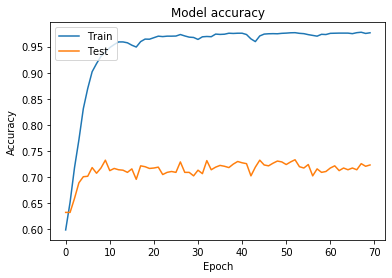

In [77]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()